In [2]:
# Import needed libs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [12]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Original data size
original_size = X.nbytes / (1024 * 1024)  # in megabytes
print("original data size is: %.2f MB" % original_size)

original data size is: 0.88 MB


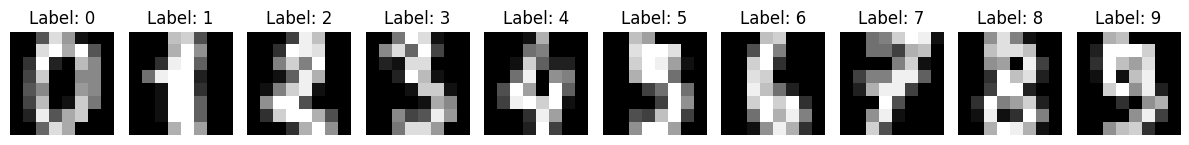

In [4]:
# Plot the first 10 samples as images
fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i in range(10):
    axes[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Print the first 2 samples in matrix form
for i in range(2):
    print(f"Sample {i+1}:")
    sample_matrix = X[i].reshape(8, 8)  # Reshape the row vector to a matrix
    print(sample_matrix)
    print(f"Label: {y[i]}")
    print()

Sample 1:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Label: 0

Sample 2:
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
Label: 1



In [13]:
# Function to calculate reconstruction error
def reconstruction_error(original, reconstructed):
    return mean_squared_error(original, reconstructed)

# Function to perform PCA and reconstruct data with n_components
def perform_pca(n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    return X_reconstructed, pca

In [54]:
def analyze_pca(n_components):
    X_reconstructed, pca = perform_pca(n_components)
    reconstruction_error_val = reconstruction_error(X, X_reconstructed)
    print(f"Number of Components: {n_components}, Reconstruction Error: {reconstruction_error_val}")

    # Size of compressed file
    compressed_size = (pca.components_.nbytes + pca.mean_.nbytes + X_reconstructed.nbytes) / (1024 * 1024)  # in megabytes
    print(f"Size of Compressed File: {compressed_size} MB")

    # Difference in size
    size_difference = original_size - compressed_size
    print(f"Difference in Size: {size_difference} MB")

    # Plot original and reconstructed images for each digit
    fig, axes = plt.subplots(2, 10, figsize=(10, 2))
    for digit in range(10):
        digit_indices = np.where(y == digit)[0]  # Indices of samples with the current digit
        original_matrix = X[digit_indices[0]].reshape(8, 8)  # Take the first sample for each digit
        reconstructed_matrix = np.round(X_reconstructed[digit_indices[0]].reshape(8, 8), 1)  # Round to one decimal place
        axes[0, digit].imshow(original_matrix, cmap='gray')
        axes[0, digit].axis('off')
        axes[1, digit].imshow(reconstructed_matrix, cmap='gray')
        axes[1, digit].axis('off')

    plt.suptitle(f'Reconstruction with {n_components} Components')
    plt.show()

    # Print the first data's matrix
    print("Original Matrix of the First Data:")
    print(original_matrix)

    # Print the reconstruction matrix
    print("\nReconstruction Matrix of the First Data:")
    print(reconstructed_matrix)


Number of Components: 4, Reconstruction Error: 9.627986407130757
Size of Compressed File: 0.8798828125 MB
Difference in Size: -0.00244140625 MB


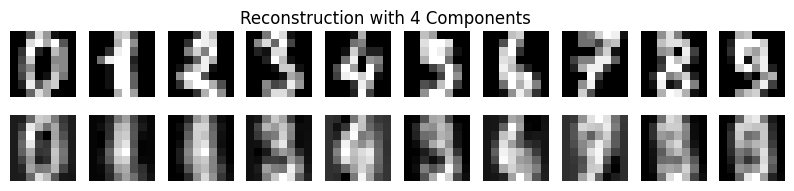

Original Matrix of the First Data:
[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]

Reconstruction Matrix of the First Data:
[[ 0.   0.2  5.  11.4 12.2  6.5  1.3  0.1]
 [ 0.   1.9 11.  10.7 10.2 10.3  2.1  0.1]
 [ 0.   2.8 10.5  5.7  6.4 10.4  2.5  0.1]
 [-0.   2.7  9.3  8.   9.5 10.2  3.2  0. ]
 [ 0.   2.3  6.3  5.2  7.8 11.6  4.3  0. ]
 [ 0.   1.5  5.5  2.7  4.6 11.3  5.3  0. ]
 [ 0.   0.7  7.6  6.9  8.4 11.9  4.5  0.1]
 [ 0.   0.1  5.2 12.  13.3  8.3  1.8  0.3]]


In [56]:
analyze_pca(4)

## Maunal way to calculate

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(64,)
   0    0    5   13    9    1    0    0
   0    0   13   15   10   15    5    0
   0    3   15    2    0   11    8    0
   0    4   12    0    0    8    8    0
   0    5    8    0    0    9    8    0
   0    4   11    0    1   12    7    0
   0    2   14    5   10   12    0    0
   0    0    6   13   10    0    0    0


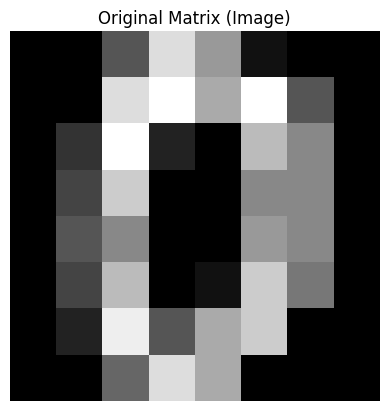

In [72]:
# Then use step-by-step wat to calculate the PCA steps;
# Take the first data point for analysis
first_data = X[0]
print(X[0])
print(X[0].shape)

# Reshape the data point into a 2D array (image)
original_matrix = first_data.reshape(8, 8)

for row in original_matrix:
    print(" ".join(f"{val:4.0f}" for val in row))

# Print the original matrix (image)
plt.imshow(original_matrix, cmap='gray')
plt.title("Original Matrix (Image)")
plt.axis('off')
plt.show()

In [76]:
# Transpose X
X_transpose = original_matrix.T

# Calculate X^T * X
XTX = np.multiply(X_transpose, original_matrix)

# Print the result
# print(XTX.shape)
print("\nX^T * X:")
print(XTX)

# Step 1: Calculate the covariance matrix
covariance_matrix = np.cov(X_transpose)

print(covariance_matrix.shape)


X^T * X:
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  39.  60.  50.  60.  10.   0.]
 [  0.  39. 225.  24.   0. 121. 112.   0.]
 [  0.  60.  24.   0.   0.   0.  40.   0.]
 [  0.  50.   0.   0.   0.   9.  80.   0.]
 [  0.  60. 121.   0.   9. 144.  84.   0.]
 [  0.  10. 112.  40.  80.  84.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
(8, 8)


In [77]:

# Step 2: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Print the eigenvalues
print("\nStep 2: Eigenvalues")
print(eigenvalues)

# Print the eigenvectors
print("\nStep 2: Eigenvectors")
print(eigenvectors)

# Find the index of the largest eigenvalue
largest_eigenvalue_index = np.argmax(eigenvalues)

# Step 3: Use the eigenvector corresponding to the largest eigenvalue to form the decoding matrix
decoding_matrix = eigenvectors[:, largest_eigenvalue_index].reshape(-1, 1)

# Print the decoding matrix
print("\nStep 3: Decoding Matrix")
print(decoding_matrix)

# Step 4: Reconstruct the data point using the decoding matrix
reconstructed_data = np.dot(decoding_matrix, decoding_matrix.T.dot(first_data))

# Reshape the reconstructed data into a 2D array (image)
reconstructed_matrix = reconstructed_data.reshape(8, 8)

# Print the reconstructed matrix
print("\nStep 4: Reconstructed Matrix")
print(reconstructed_matrix)

# Plot the reconstructed matrix (image)
plt.imshow(reconstructed_matrix, cmap='gray')
plt.title("Reconstructed Matrix (Image)")
plt.axis('off')
plt.show()


Step 2: Eigenvalues
[8.92158455e+01 3.14545089e+01 7.61850164e+00 2.85144338e+00
 2.01453633e-01 1.53898738e-02 0.00000000e+00 0.00000000e+00]

Step 2: Eigenvectors
[[ 0.          0.          0.          0.          0.          0.
   1.          0.        ]
 [-0.20365153  0.09344175  0.07506402 -0.23052329 -0.41043409 -0.85003703
   0.          0.        ]
 [-0.22550077 -0.48188982  0.20855091  0.79993174 -0.1168451  -0.14104805
   0.          0.        ]
 [ 0.65318552 -0.28875672 -0.59464342  0.12374602  0.11324705 -0.32898247
   0.          0.        ]
 [ 0.48997693 -0.31860576  0.39448425 -0.20610464 -0.63307453  0.24399318
   0.          0.        ]
 [-0.33563583 -0.75773097 -0.0607778  -0.49775699  0.24837474  0.00681139
   0.          0.        ]
 [-0.35818338 -0.00212894 -0.66178497  0.03760326 -0.58531429  0.29955628
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.        ]]

Step 3: Decoding Matrix
[[ 0.        ]
 

ValueError: shapes (1,8) and (64,) not aligned: 8 (dim 1) != 64 (dim 0)